In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

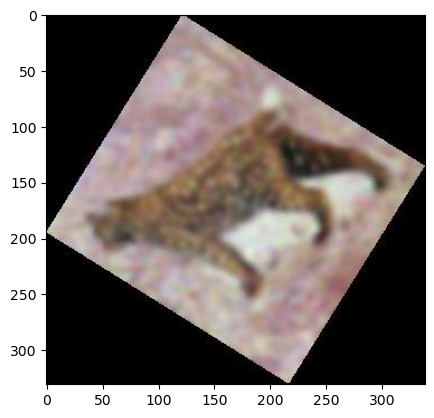

In [9]:
path = 'E:\\Lab3Image.jpg'
image = cv.imread(path)
cv.imshow("Source Image", image)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(image)

In [3]:
scale_percent = 200
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(image, dim, interpolation=cv.INTER_AREA)

In [4]:
(h, w, d) = resized_image.shape
angle = -58
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotate_image = cv.warpAffine(resized_image, M, (w, h))

In [5]:
ROI = (110, 90, 460, 490)
cropped_image = rotate_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]

In [6]:
kernel1 = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

kernel11 = np.array([[1, 1, 1],
                   [1, 9, 1],
                   [1, 1, 1]])

kernel2 = np.array([[-0.25, -0.25, -0.25],
                   [-0.25, 3, -0.25],
                   [-0.25, -0.25, -0.25]])

kernel3 = np.array([[0, -0.25, 0],
                   [-0.25, 2, -0.25],
                   [0, -0.25, 0]])

kernel4 = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

lut = lambda i: 255 - i
invert_image = lut(cropped_image)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
rgb_res_image = np.empty(np.shape(invert_image), np.uint8)
rgb_res_image[:, :, 0] = clahe.apply(invert_image[:, :, 0])
rgb_res_image[:, :, 1] = clahe.apply(invert_image[:, :, 1])
rgb_res_image[:, :, 2] = clahe.apply(invert_image[:, :, 2])

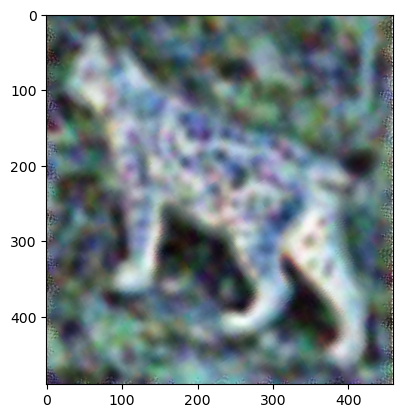

In [11]:
res_image = cv.filter2D(rgb_res_image, ddepth=-1, kernel=kernel4)
cv.imshow("Result Image", res_image)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(res_image)